# Read in data for the cumulative counts for PGW and CTRL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ctrl_counts = pd.read_csv("../table_data/combined_CTRL_daily_count.csv")
ctrl_counts['date'] = pd.to_datetime(ctrl_counts.date)
ctrl_counts = ctrl_counts.set_index('date')

pgw_counts = pd.read_csv("../table_data/combined_PGW_daily_count.csv")
pgw_counts['date'] = pd.to_datetime(pgw_counts.date)
pgw_counts = pgw_counts.set_index('date')

ctrl_counts['daily_mean'] = ctrl_counts.mean(axis=1)
pgw_counts['daily_mean'] = pgw_counts.mean(axis=1)

ctrl_counts.head()

,2000_2001,2001_2002,2002_2003,2003_2004,2005_2006,2006_2007,2007_2008,2008_2009,2009_2010,2010_2011,2011_2012,2012_2013,daily_mean
date,,,,,,,,,,,,,
2003-10-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
2003-10-02,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667
2003-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2003-10-04,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.250000
2003-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


# Plot the data

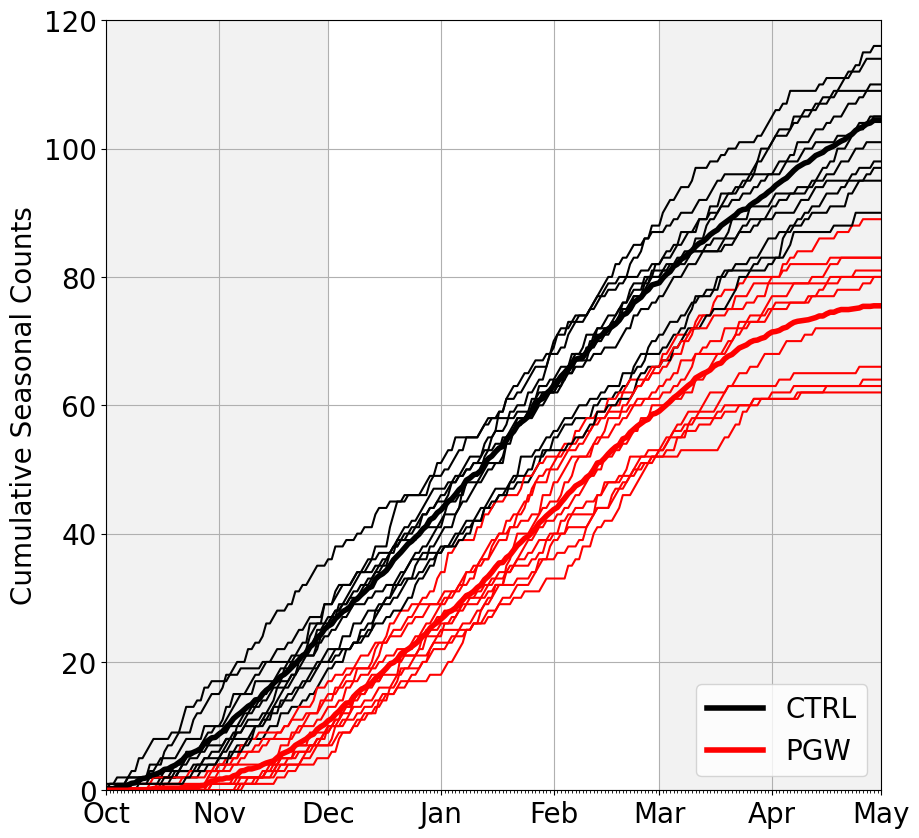

In [2]:
import matplotlib.dates as mdates
import datetime
import numpy as np
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

monthsFmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()

ax = plt.subplot(1,1,1)

for year in range(2000, 2012):
    
    if year != 2004:
        season_str = "{}_{}".format(year, year+1)
        season_counts = ctrl_counts[season_str]
        season_counts = season_counts.cumsum()
        ax.plot(season_counts.index, season_counts.values, "k-")
        
        season_str = "{}_{}".format(year, year+1)
        season_counts = pgw_counts[season_str]
        season_counts = season_counts.cumsum()
        ax.plot(season_counts.index, season_counts.values, "r-")
    
overall_mean = ctrl_counts['daily_mean'].cumsum()
ax.plot(overall_mean.index, overall_mean.values, 'k-', lw=4, label='CTRL')

overall_mean = pgw_counts['daily_mean'].cumsum()
ax.plot(overall_mean.index, overall_mean.values, 'r-', lw=4, label='PGW')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))

ax.axvspan(datetime.datetime(2003, 10, 1), datetime.datetime(2003, 12, 1), facecolor='0.5', alpha=0.1)
ax.axvspan(datetime.datetime(2004, 3, 1), datetime.datetime(2004, 5, 1), facecolor='0.5', alpha=0.1)
ax.grid()

ax.set_xlim(datetime.datetime(2003, 10, 1), datetime.datetime(2004, 5, 1))
ax.set_ylim(0, 120)

ax.set_ylabel("Cumulative Seasonal Counts")

ax.legend(loc=4, prop={'size': 20})

# Plot the data distributions per month

(-0.5, 6.5)

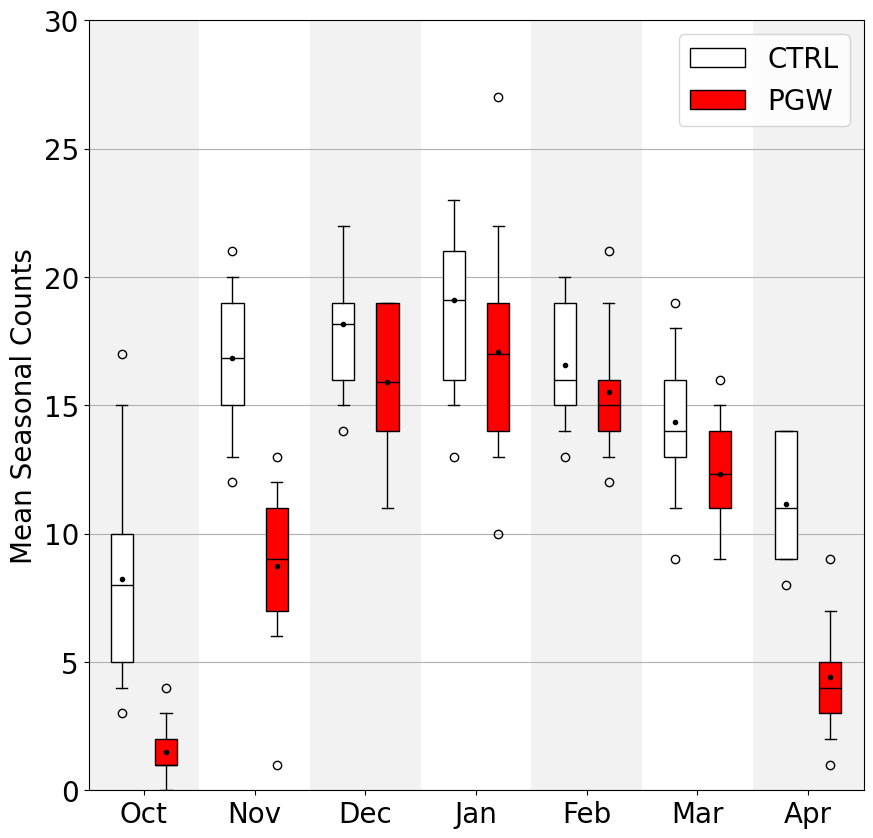

In [3]:
ax = plt.subplot(1,1,1)

pos = 0
for m in [10, 11, 12, 1, 2, 3, 4]:
    
    
    ctrl_month = ctrl_counts[ctrl_counts.index.month==m]
    pgw_month = pgw_counts[pgw_counts.index.month==m]
    
    meanpointprops = dict(marker='.', markeredgecolor='k',
                  markerfacecolor='k')
    
    bplot1 = ax.boxplot(ctrl_month.sum(axis=0), positions=np.array([pos])-.2, widths=0.2, whis=[5,95],
                   patch_artist=True, showmeans=True, showfliers=True, meanprops=meanpointprops)

    [item.set_color('black') for item in bplot1['means']] 

    [patch.set_facecolor('w') for patch in bplot1['boxes']]

    plt.setp(bplot1['medians'], color='k')
    
    bplot2 = ax.boxplot(pgw_month.sum(axis=0), positions=np.array([pos])+.2, widths=0.2, whis=[5,95],
                   patch_artist=True, showmeans=True, showfliers=True, meanprops=meanpointprops)
    
    plt.setp(bplot2['medians'], color='k')

    [item.set_color('r') for item in bplot2['means']] 

    [patch.set_facecolor('r') for patch in bplot2['boxes']]
    
    pos += 1
    
ax.set_xticks(np.array([0,1,2,3,4,5,6]))
ax.set_xticklabels(['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr'])

plt.legend([bplot1["boxes"][0], bplot2["boxes"][0]], ['CTRL', 'PGW'],loc=1, prop={'size': 20})

ax.set_ylabel("Mean Seasonal Counts")

ax.axvspan(-1, .5, facecolor='0.5', alpha=0.1)
ax.axvspan(1.5, 2.5, facecolor='0.5', alpha=0.1)
ax.axvspan(3.5, 4.5, facecolor='0.5', alpha=0.1)
ax.axvspan(5.5, 6.5, facecolor='0.5', alpha=0.1)

ax.yaxis.grid(True)

ax.set_ylim(0, 30)
ax.set_xlim(-.5, 6.5)

# Read in data for cumulative SWE for PGW and CTRL

In [4]:
ctrl_swe = pd.read_csv("../table_data/combined_CTRL_daily_swe.csv")
ctrl_swe['date'] = pd.to_datetime(ctrl_swe.date)
ctrl_swe = ctrl_swe.set_index('date')

pgw_swe = pd.read_csv("../table_data/combined_PGW_daily_swe.csv")
pgw_swe['date'] = pd.to_datetime(pgw_swe.date)
pgw_swe = pgw_swe.set_index('date')

ctrl_swe['daily_mean'] = ctrl_swe.mean(axis=1)
pgw_swe['daily_mean'] = pgw_swe.mean(axis=1)

ctrl_swe.head()

,2000_2001,2001_2002,2002_2003,2003_2004,2005_2006,2006_2007,2007_2008,2008_2009,2009_2010,2010_2011,2011_2012,2012_2013,daily_mean
date,,,,,,,,,,,,,
2003-10-01,0.000000,0.0,1.258831,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.104903
2003-10-02,0.000000,0.0,0.314722,0.503095,4.568146,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.448830
2003-10-03,0.000000,0.0,0.000000,3.120740,1.237818,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.363213
2003-10-04,0.405938,0.0,0.000000,0.000000,0.268286,0.0,0.0,0.0,0.0,0.0,0.0,1.989783,0.222001
2003-10-05,0.941720,0.0,0.000000,0.000000,7.491952,0.0,0.0,0.0,0.0,0.0,0.0,7.725175,1.346571


# Plot the data

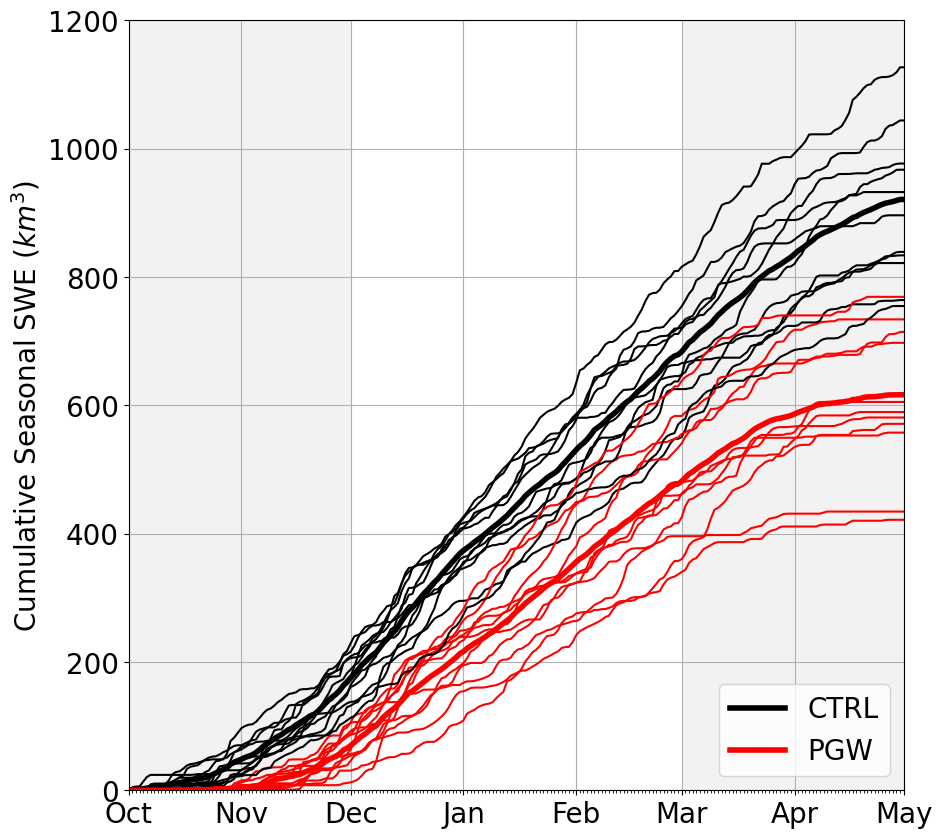

In [5]:
import matplotlib.dates as mdates
import datetime
import numpy as np
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

monthsFmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()

ax = plt.subplot(1,1,1)

for year in range(2000, 2012):
    
    if year != 2004:
        season_str = "{}_{}".format(year, year+1)
        season_counts = ctrl_swe[season_str]
        season_counts = season_counts.cumsum()
        ax.plot(season_counts.index, season_counts.values, "k-")
        
        season_str = "{}_{}".format(year, year+1)
        season_counts = pgw_swe[season_str]
        season_counts = season_counts.cumsum()
        ax.plot(season_counts.index, season_counts.values, "r-")
    
overall_mean = ctrl_swe['daily_mean'].cumsum()
ax.plot(overall_mean.index, overall_mean.values, 'k-', lw=4, label='CTRL')

overall_mean = pgw_swe['daily_mean'].cumsum()
ax.plot(overall_mean.index, overall_mean.values, 'r-', lw=4, label='PGW')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))

ax.axvspan(datetime.datetime(2003, 10, 1), datetime.datetime(2003, 12, 1), facecolor='0.5', alpha=0.1)
ax.axvspan(datetime.datetime(2004, 3, 1), datetime.datetime(2004, 5, 1), facecolor='0.5', alpha=0.1)
ax.grid()

ax.set_xlim(datetime.datetime(2003, 10, 1), datetime.datetime(2004, 5, 1))
ax.set_ylim(0, 1200)

ax.set_ylabel("Cumulative Seasonal SWE $(km^3)$")

ax.legend(loc=4, prop={'size': 20})

# Plot the data distributions per month

(-0.5, 6.5)

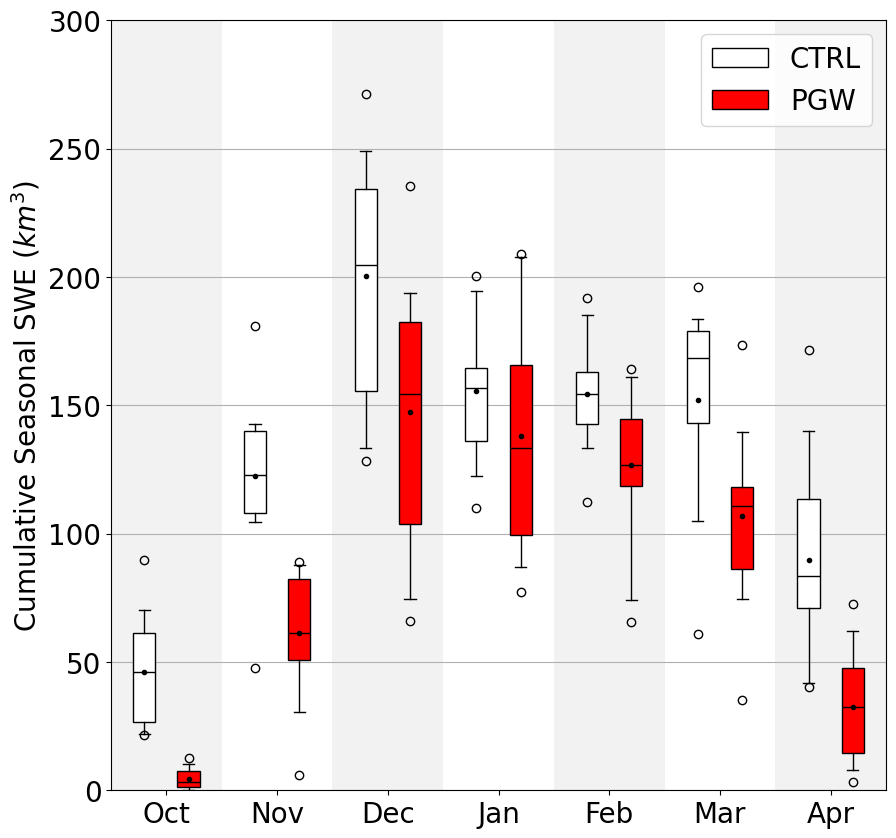

In [6]:
ax = plt.subplot(1,1,1)

pos = 0
for m in [10, 11, 12, 1, 2, 3, 4]:
    
    
    ctrl_month = ctrl_swe[ctrl_swe.index.month==m]
    pgw_month = pgw_swe[pgw_swe.index.month==m]
    
    meanpointprops = dict(marker='.', markeredgecolor='k',
                  markerfacecolor='k')
    
    bplot1 = ax.boxplot(ctrl_month.sum(axis=0), positions=np.array([pos])-.2, widths=0.2, whis=[5,95],
                   patch_artist=True, showmeans=True, showfliers=True, meanprops=meanpointprops)

    [item.set_color('black') for item in bplot1['means']] 

    [patch.set_facecolor('w') for patch in bplot1['boxes']]

    plt.setp(bplot1['medians'], color='k')
    
    bplot2 = ax.boxplot(pgw_month.sum(axis=0), positions=np.array([pos])+.2, widths=0.2, whis=[5,95],
                   patch_artist=True, showmeans=True, showfliers=True, meanprops=meanpointprops)
    
    plt.setp(bplot2['medians'], color='k')

    [item.set_color('r') for item in bplot2['means']] 

    [patch.set_facecolor('r') for patch in bplot2['boxes']]
    
    pos += 1
    
ax.set_xticks(np.array([0,1,2,3,4,5,6]))
ax.set_xticklabels(['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr'])

plt.legend([bplot1["boxes"][0], bplot2["boxes"][0]], ['CTRL', 'PGW'],loc=1, prop={'size': 20})

ax.set_ylabel("Cumulative Seasonal SWE $(km^3)$")

ax.axvspan(-1, .5, facecolor='0.5', alpha=0.1)
ax.axvspan(1.5, 2.5, facecolor='0.5', alpha=0.1)
ax.axvspan(3.5, 4.5, facecolor='0.5', alpha=0.1)
ax.axvspan(5.5, 6.5, facecolor='0.5', alpha=0.1)

ax.yaxis.grid(True)

ax.set_ylim(0, 300)
ax.set_xlim(-.5, 6.5)